# Background
* Lending marketplaces (P-2-P) received loan applicants and these marketplaces act as intermediary between applicants and lending companies.

* Lending companies must assess the quality of these leads to decide whether or not the offer them loan.

* We need to develop a model to predict the "quality applicants". 
    * "Quality applicants" are those who reach a key part of the loan application process. For example, someone who reaches the part X of the process, is deemed really interested in the loan.

# Case Study

* We work for a fintech company that offers loans to customers based on financial habits.
* Company has partnered with P2P lending marketplaces to get leads. Conversions from these leads have been good so far.
# Goal -
* Predict if the leads will complete the electronic signature phase of loan application (e-sign) to identify those who finish the onboarding process.

## Why e-sign process ?
* the last step of finalising the loan application. The leads come from the marketplace to the fintech app and finish the application after e-signature.

# Libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [2]:
data=pd.read_csv('findata.csv')

In [3]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

# EDA

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000,17908.00000
mean,5596977.61615,43.01541,0.42517,3657.21465,1.18601,3.52686,3.58471,3.42718,3.50335,0.79540,950.44645,61086.30221,0.69088,0.87828,0.58315,0.71825,0.62311,0.62207,6.45723,0.53825
std,2562472.75067,11.87311,0.49438,1504.89006,2.40090,2.25973,2.75194,2.21644,1.95557,0.40342,698.54368,15394.25502,0.09047,0.05456,0.12506,0.12070,0.13973,0.13990,3.67309,0.49855
min,1111398.00000,18.00000,0.00000,905.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,350.00000,2100.00000,0.02326,0.45137,0.01672,0.15337,0.01018,0.00662,1.00000,0.00000
25%,3378998.75000,34.00000,0.00000,2580.00000,0.00000,2.00000,2.00000,2.00000,2.00000,1.00000,600.00000,49350.00000,0.64099,0.85088,0.50021,0.63371,0.52173,0.51968,4.00000,0.00000
50%,5608376.00000,42.00000,0.00000,3260.00000,0.00000,3.00000,3.00000,2.00000,3.00000,1.00000,700.00000,61200.00000,0.69956,0.88100,0.58821,0.72511,0.62594,0.62297,6.00000,1.00000
75%,7805624.25000,51.00000,1.00000,4670.00000,1.00000,5.00000,5.00000,5.00000,4.00000,1.00000,1100.00000,72750.00000,0.75289,0.91261,0.67239,0.80668,0.72984,0.72894,8.00000,1.00000
max,9999874.00000,96.00000,1.00000,9985.00000,11.00000,16.00000,12.00000,11.00000,15.00000,1.00000,10200.00000,99750.00000,1.00000,0.99902,0.97893,0.99626,0.97025,0.96695,30.00000,1.00000


In [6]:
# Clean the data
#No null values
data.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

# Histograms

In [7]:
#Only numerical ones with non-nulls
numerical_cols=data.drop(columns=['entry_id','e_signed','pay_schedule'])

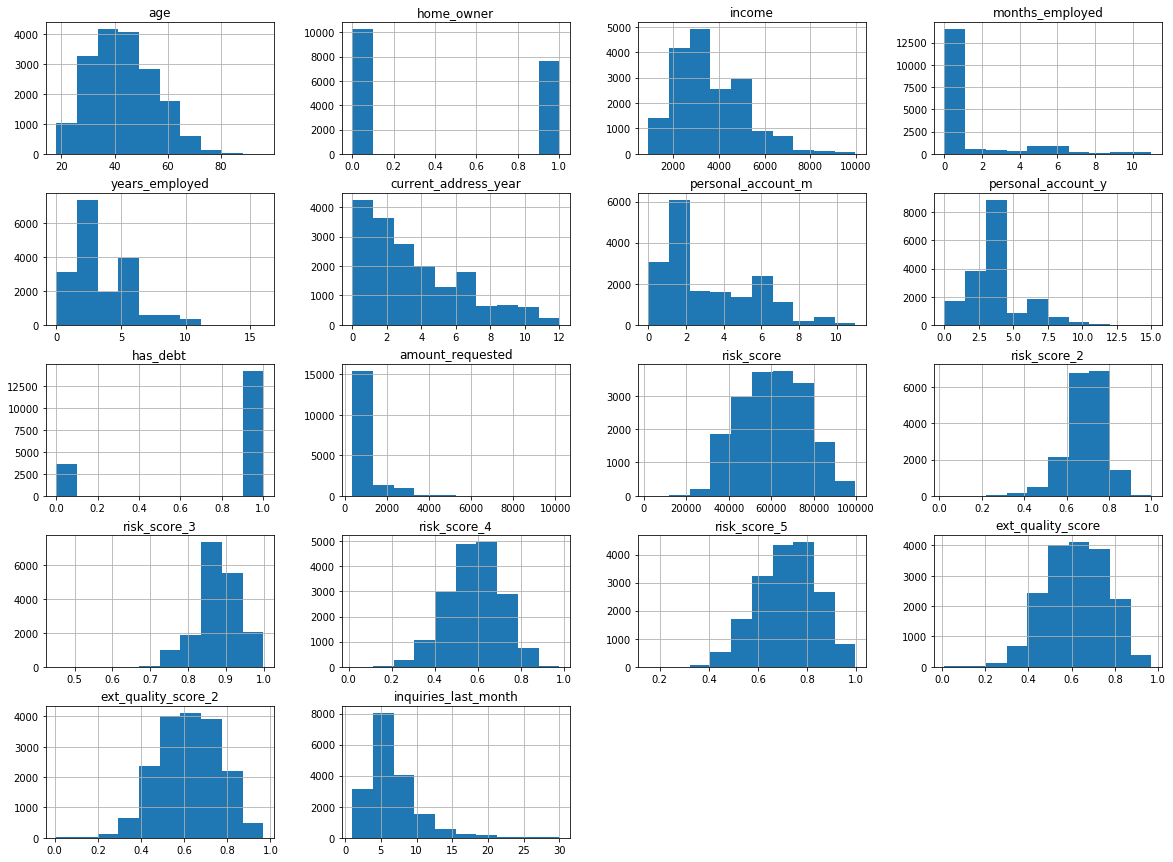

In [8]:
numerical_cols.hist(figsize=(20,15));

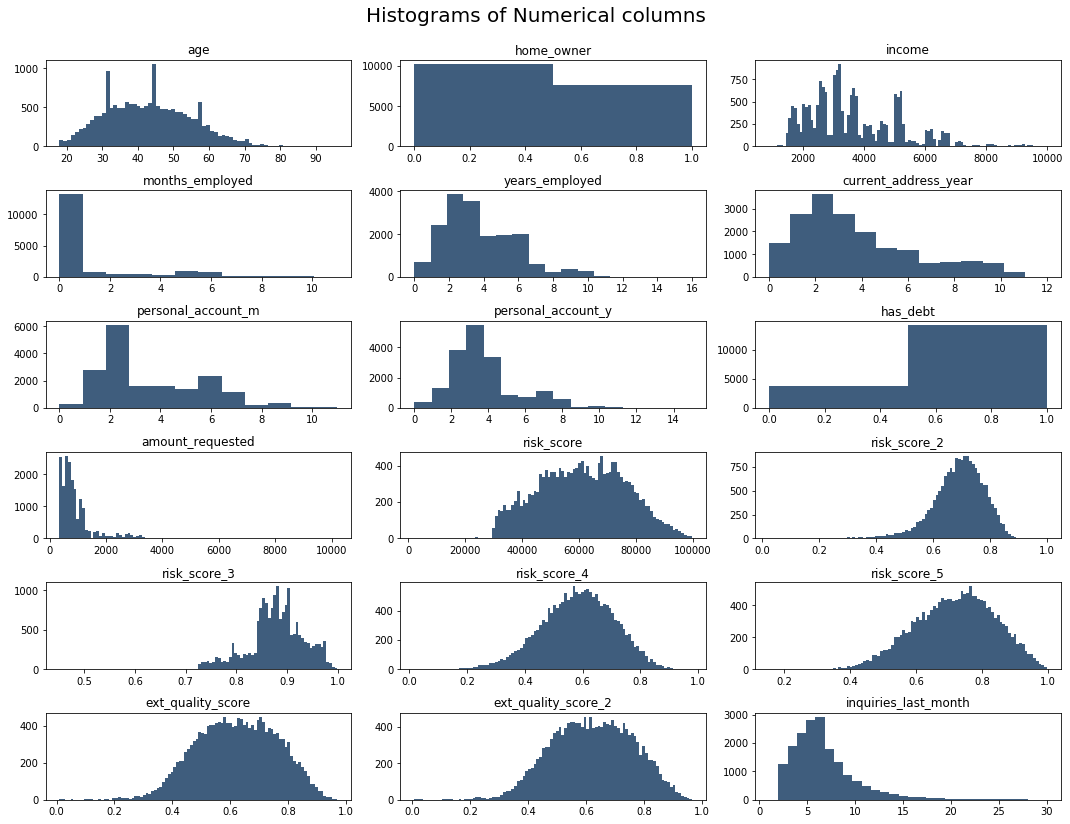

In [9]:
fig=plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical columns',fontsize=20)
for i in range(numerical_cols.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(numerical_cols.columns.values[i])
    vals=numerical_cols.iloc[:,i].nunique()
    if vals>=100:
        vals=100
    plt.hist(numerical_cols.iloc[:,i],bins=vals,color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])     

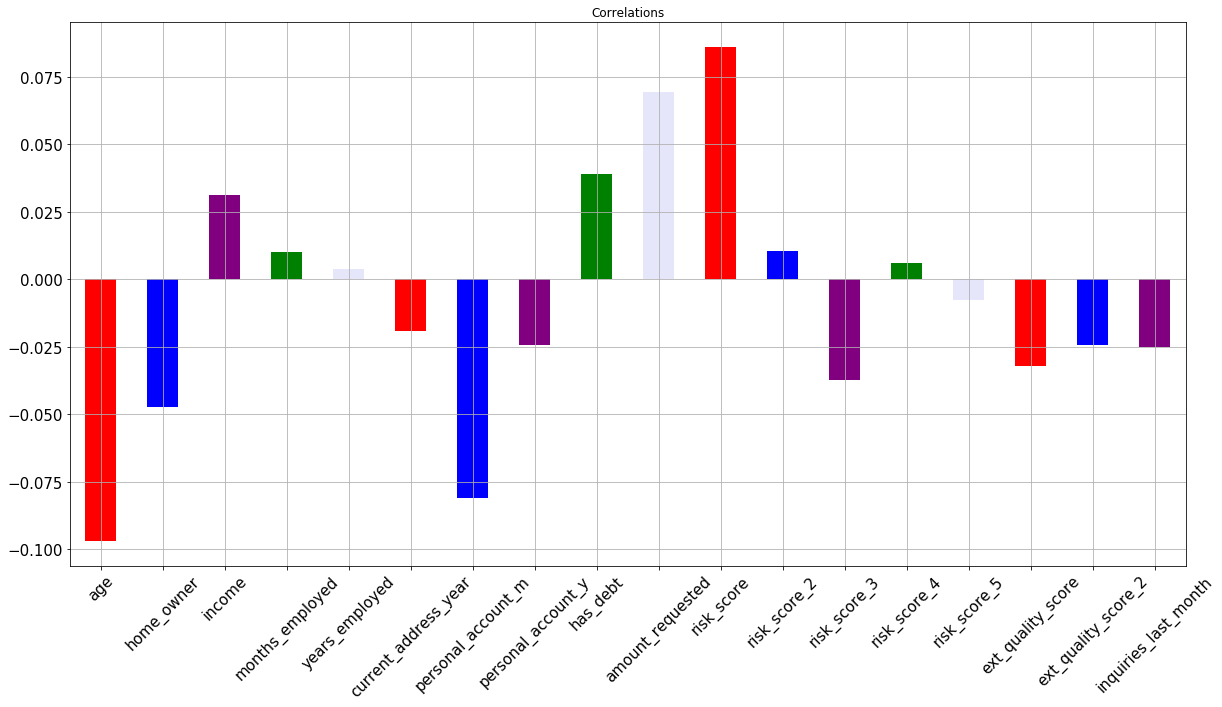

In [10]:
# Correlation plot
numerical_cols.corrwith(data['e_signed']).plot.bar(figsize=(20,10),title='Correlations',fontsize=15,color=['red', 'blue', 'purple', 'green', 'lavender'],rot=45,grid=True);

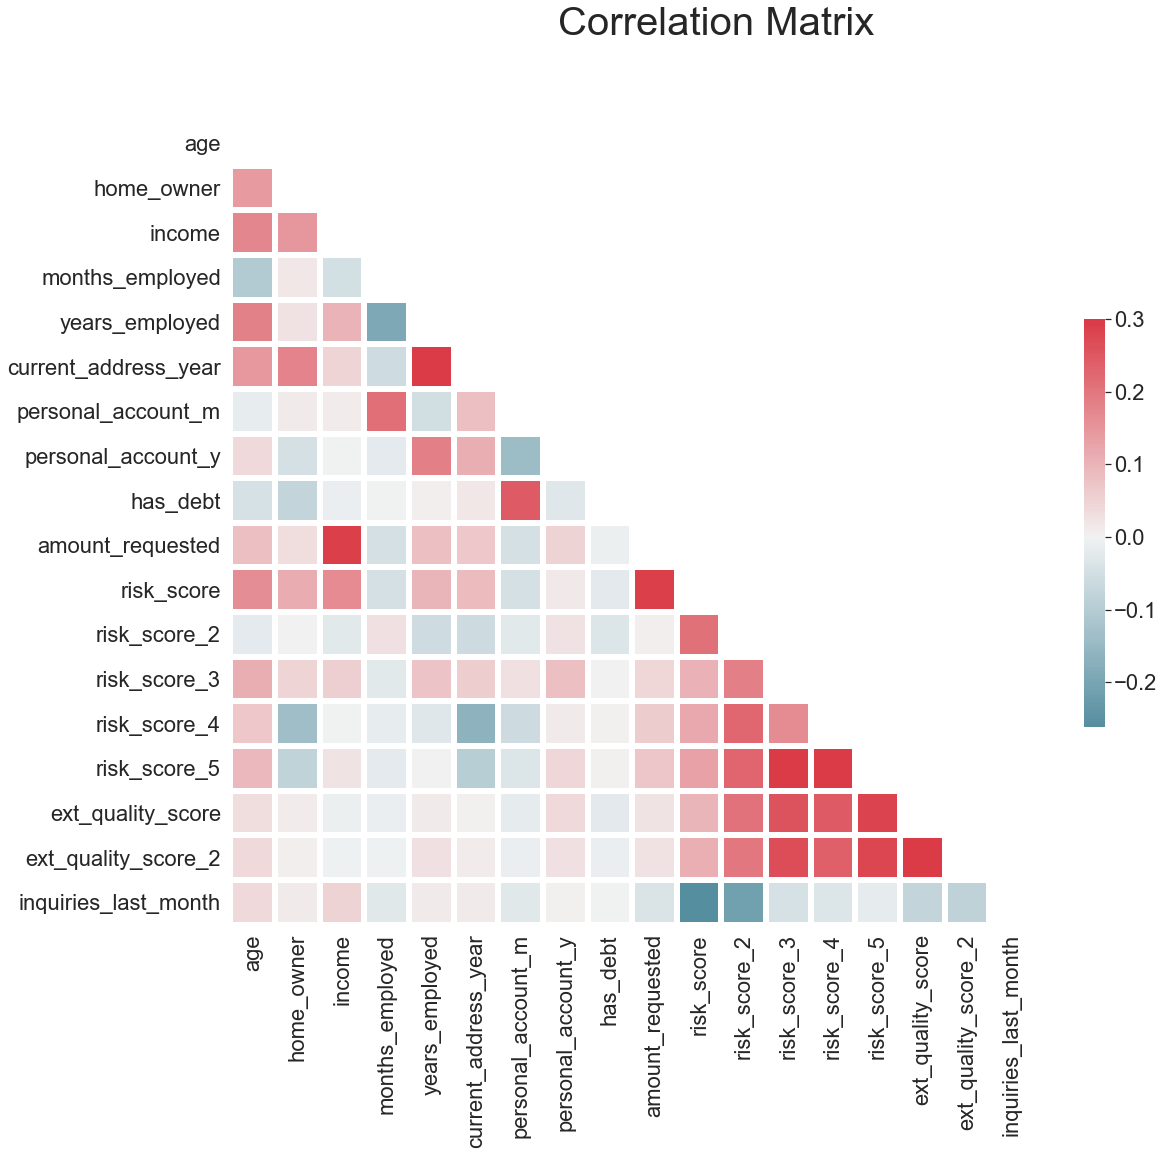

In [11]:
sns.set(style='white',font_scale=2)
corr=numerical_cols.corr()
#mask for upper triangle
#because lower end is same as upper end
#thus, no upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#setup matplot fig
f,ax=plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix',fontsize=40)

#generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

#
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=5,cbar_kws={'shrink':.5});

* No correlations are too strong to be enquired into

# Feature Engineering

* Since months employed was all collected on the value 0, it isnt the correct representation of data & can be dropped

In [12]:
data=data.drop(columns=['months_employed'])

* personal account y & m columns shows the year and months in the account - but we need to combine them.

In [13]:
data['personal_acc_months']=(data.personal_account_m)+(data.personal_account_y*12)

In [14]:
data=data.drop(columns=['personal_account_m','personal_account_y'])

In [15]:
data.shape

(17908, 19)

# One hot Encoding

In [16]:
data=pd.get_dummies(data)


* Dummy variable trap to be avoided - since now columns would be dependent.
* So we drop one dummy column

In [17]:
pd.set_option('display.max_columns',None)
data.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_acc_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.73740,0.90352,0.48771,0.51598,0.58092,0.38092,10,1,30,1,0,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.73851,0.88103,0.71342,0.82640,0.73072,0.63072,9,0,86,0,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.64299,0.76655,0.59502,0.76228,0.53171,0.53171,7,0,19,0,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.66522,0.96083,0.76783,0.77883,0.79255,0.59255,8,1,86,1,0,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.61736,0.85756,0.61349,0.66552,0.74463,0.74463,12,0,98,0,0,1,0


In [18]:
data=data.drop(columns=['pay_schedule_semi-monthly'])

## Remove columns not needed for training
* Remove response variable
* and entry_id

In [19]:
response=data['e_signed']
users=data['entry_id']
data=data.drop(columns=['e_signed','entry_id'])

# Split train test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(data,response,test_size=0.2)

In [22]:
X_train.shape,X_test.shape

((14326, 19), (3582, 19))

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
X_train2=pd.DataFrame(sc.fit_transform(X_train))
X_test2=pd.DataFrame(sc.transform(X_test))

In [26]:
X_train2.columns=X_train.columns.values

In [27]:
X_test2.columns=X_test.columns.values

In [28]:
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

In [29]:
X_train=X_train2
X_test=X_test2

In [30]:
X_train.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_acc_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
4243,-0.75464,-0.85733,2.16053,-0.67095,-0.94040,0.50934,-0.21646,1.30543,0.09164,-0.44256,0.06625,0.77275,-1.32603,-0.59699,0.70056,-0.31815,-1.22268,-0.30085,-0.50869
4518,-0.50203,1.16641,1.60682,0.65625,-0.94040,0.50934,0.35597,-0.51915,-1.94985,-0.52303,0.36827,0.82730,-0.99135,-0.26317,0.15099,-0.10375,0.81787,-0.30085,-0.50869
9025,-1.17567,-0.85733,-0.70477,0.21385,-0.21073,-1.96332,-0.50268,0.46606,-0.99154,-0.33698,-1.85783,-1.03628,-0.63889,-0.62694,0.15099,0.66810,0.81787,-0.30085,-0.50869
4314,-1.09146,-0.85733,1.90703,-0.67095,-1.30523,0.50934,-0.64578,-1.48816,-0.26818,-0.05131,-1.82479,-1.26149,-0.94561,0.49777,1.25013,-0.31815,0.81787,-0.30085,-0.50869
13143,-1.17567,-0.85733,-0.67475,0.65625,0.51893,0.50934,0.35597,-1.85114,-1.60001,-0.35941,-1.18406,-0.33618,1.41282,-0.72653,-0.67336,-0.36104,0.81787,-0.30085,-0.50869


In [144]:
user_test=users[X_test.index]

# Model Building

* Models to be tried -
    * Logistic Regression
    * SVM - Linear and RBF
    * Random Forest

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_clf=LogisticRegression(penalty='l1',solver='liblinear')

In [33]:
log_clf.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

## Predict test set

In [34]:
y_pred=log_clf.predict(X_test)

## Evaluation Metrics

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [36]:
acc=accuracy_score(y_test,y_pred)

In [37]:
pre=precision_score(y_test,y_pred)

In [38]:
rec=recall_score(y_test,y_pred)

In [39]:
f1=f1_score(y_test,y_pred)

In [40]:
results=pd.DataFrame([['Logistic Regression(Lasso)',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score'])

# SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svc_clf=SVC(kernel='linear')
svc_clf.fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)

In [43]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [44]:
results=results.append(pd.DataFrame([['SVM_linear',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score']),ignore_index=True)

In [45]:
results

,Model_Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression(Lasso),0.57231,0.57149,0.73989,0.64488
1,SVM_linear,0.57426,0.57114,0.75798,0.65143


* When recall is high - it could be because the model has remembered the training set.

# SVM (RBF)

In [46]:
svc_rbf_clf=SVC(kernel='rbf')
svc_rbf_clf.fit(X_train,y_train)
y_pred=svc_rbf_clf.predict(X_test)

In [47]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [48]:
results=results.append(pd.DataFrame([['SVM_rbf',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score']),ignore_index=True)

In [49]:
results

,Model_Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression(Lasso),0.57231,0.57149,0.73989,0.64488
1,SVM_linear,0.57426,0.57114,0.75798,0.65143
2,SVM_rbf,0.60162,0.60180,0.71223,0.65238


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
fr_clf=RandomForestClassifier(n_estimators=100,criterion='entropy')
fr_clf.fit(X_train,y_train)
y_pred=fr_clf.predict(X_test)

In [52]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [53]:
results=results.append(pd.DataFrame([['Random_Forest(n=100)',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score']),ignore_index=True)

In [54]:
results

,Model_Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression(Lasso),0.57231,0.57149,0.73989,0.64488
1,SVM_linear,0.57426,0.57114,0.75798,0.65143
2,SVM_rbf,0.60162,0.60180,0.71223,0.65238
3,Random_Forest(n=100),0.62814,0.63048,0.70426,0.66533


* Our Random Forest was most accurate with good performance on all four metrics (not skewed in any).

# K-Fold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
accuracies=cross_val_score(estimator=fr_clf,X=X_train,y=y_train,cv=10)

In [57]:
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"%(accuracies.mean(),accuracies.std()*2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.02)


* Confirms that model is consistent across all data & no subset of data can spoil our model.

# Find best parameters - GRID SEARCH

In [58]:
#Entropy
parameters={'max_depth':[2,3,4],
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True,False],
           'criterion':['entropy']}

In [59]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_cv=GridSearchCV(estimator=fr_clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [65]:
t0=time.time()

In [66]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['entropy'],
                         'max_depth': [2, 3, 4], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [67]:
t1=time.time()

In [68]:
print("Took %0.2f seconds"%(t1-t0))

Took 417.90 seconds


In [69]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features=5, min_samples_split=5)

In [70]:
rf_best_accuracy=grid_cv.best_score_

In [71]:
rf_best_params=grid_cv.best_params_

In [72]:
rf_best_accuracy

0.6097279508941277

In [73]:
rf_best_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

* Accuracy isn't great, we can try some more parameters

# Second round of gridsearch

In [95]:
parameters={'max_depth':[4,5],
           'max_features':[4,5,6],
           'min_samples_split':[4,5,6],
           'min_samples_leaf':[1,2,3],
           'bootstrap':[False],
           'criterion':['entropy']}

In [96]:
grid_cv=GridSearchCV(estimator=fr_clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [97]:
t0=time.time()
grid_cv.fit(X_train,y_train)
t1=time.time()

In [98]:
print("Took %0.2f seconds"%(t1-t0))

Took 228.29 seconds


In [99]:
rf_best_accuracy=grid_cv.best_score_

In [100]:
rf_best_params=grid_cv.best_params_

In [101]:
rf_best_accuracy

0.6158705707836433

In [102]:
rf_best_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [103]:
y_pred=grid_cv.predict(X_test)

In [104]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [105]:
results=results.append(pd.DataFrame([['Random_Forest(n=100,GS+Entropy)',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score']),ignore_index=True)

In [106]:
results

,Model_Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression(Lasso),0.57231,0.57149,0.73989,0.64488
1,SVM_linear,0.57426,0.57114,0.75798,0.65143
2,SVM_rbf,0.60162,0.60180,0.71223,0.65238
3,Random_Forest(n=100),0.62814,0.63048,0.70426,0.66533
4,"Random_Forest(n=100,GS+Entropy)",0.60664,0.60173,0.74096,0.66412
5,"Random_Forest(n=100,GS+Entropy)",0.60302,0.60915,0.67979,0.64253


# Rounds of GridSearch with Gini

In [87]:
#Entropy
parameters={'max_depth':[2,3,4],
           'max_features':[1,5,10],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,5,10],
           'bootstrap':[True,False],
           'criterion':['gini']}

In [88]:
grid_cv=GridSearchCV(estimator=fr_clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [89]:
t0=time.time()
grid_cv.fit(X_train,y_train)
t1=time.time()

In [90]:
print("Took %0.2f seconds"%(t1-t0))

Took 381.04 seconds


In [91]:
rf_best_accuracy=grid_cv.best_score_

In [92]:
rf_best_params=grid_cv.best_params_

In [93]:
rf_best_accuracy

0.6100067931869306

In [94]:
rf_best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

# Round 2 with Gini

In [107]:
#Entropy
parameters={'max_depth':[4,5,6],
           'max_features':[4,5,6],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[9,10,11],
           'bootstrap':[False],
           'criterion':['gini']}

In [108]:
grid_cv=GridSearchCV(estimator=fr_clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)

In [109]:
t0=time.time()
grid_cv.fit(X_train,y_train)
t1=time.time()

In [110]:
print("Took %0.2f seconds"%(t1-t0))

Took 284.02 seconds


In [111]:
rf_best_accuracy=grid_cv.best_score_

In [112]:
rf_best_params=grid_cv.best_params_

In [113]:
rf_best_accuracy

0.6248043425715478

In [114]:
rf_best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 11,
 'min_samples_split': 3}

In [115]:
y_pred=grid_cv.predict(X_test)

In [117]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [120]:
results=results.append(pd.DataFrame([['Random_Forest(n=100,GS+Gini)',acc,pre,rec,f1]],columns=['Model_Name','Accuracy','Precision','Recall','F1-Score']),ignore_index=True)

In [124]:
results

,Model_Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression(Lasso),0.57231,0.57149,0.73989,0.64488
1,SVM_linear,0.57426,0.57114,0.75798,0.65143
2,SVM_rbf,0.60162,0.60180,0.71223,0.65238
3,Random_Forest(n=100),0.62814,0.63048,0.70426,0.66533
5,"Random_Forest(n=100,GS+Entropy)",0.60302,0.60915,0.67979,0.64253
7,"Random_Forest(n=100,GS+Gini)",0.61418,0.61846,0.69149,0.65294


* Best model is Random Forest (n=100) is best with higher Accuracy, Precision, Recall and F1

# Final results

In [146]:
final=pd.concat([y_test,user_test],axis=1).dropna()

In [147]:
final['preds']=fr_clf.predict(X_test)

In [153]:
final=final[['entry_id','e_signed','preds']].reset_index().drop(columns='index')

In [154]:
final

,entry_id,e_signed,preds
0,6788497,0,0
1,9256921,0,0
2,6335710,1,1
3,8320175,1,1
4,3802675,1,1
...,...,...,...
3577,9234410,1,0
3578,9835418,1,0
3579,8709063,0,1
3580,7069276,0,0


# Conclusion
* Our Model gave us around 64% accuracy. 
* Our model tells us whether or not someone will reach the esigning step.
* One way to use the model is to reach out to those not likely to esign with customized experience. This way we can get those users not expected to sign to onboard, and increase our profits.
    